### wrangle_act.ipynb
# Wrangling and Analyze Data
## Data Gathering

### In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

In [7]:
#importing libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os
import requests

# GATHERING DATA

In [8]:
#reading twitter archive csv
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
#inserting url and checking the validity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [10]:
#reading tsv data
df_img_prediction = pd.read_table(url, sep="\t")
df_img_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Initialising Variables for twitter  API

In [11]:
#file = open("tweet-json", "r")
#read = file.readlines()
import json
# load twitter API data
with open("tweet-json") as f:
    df_twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# change column names
df_twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# use tweet id column as index
df_twitter_api.set_index('tweet_id', inplace = True)
# display few lines
df_twitter_api.head()



,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


# ACCESSING TWITTER ARCHIVE

In [12]:
#display twitter archive data
df_twitter_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1437,697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256...,10,10,Oakley,None,None,None,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
209,852226086759018497,NaN,NaN,2017-04-12 18:25:07 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14,10,General,None,None,None,None


In [13]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#checking number of retweets
df_twitter_archive["retweeted_status_id"].value_counts().sum()

181

In [15]:
#checking number of status reply
df_twitter_archive["in_reply_to_status_id"].value_counts().sum()

78

In [16]:
#checking names
df_twitter_archive["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [17]:


# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    df_twitter_archive[category] = df_twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

df_twitter_archive['number_categories'] = df_twitter_archive.loc[:,categories].sum(axis = 1)



In [18]:
df_twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [19]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
# check rating numerator
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
# check ratings with denominator greather than 10
df_twitter_archive[df_twitter_archive.rating_numerator > 10][['text', 'rating_numerator']]


,text,rating_numerator
0,This is Phineas. He's a mystical boy. Only eve...,13
1,This is Tilly. She's just checking pup on you....,13
2,This is Archie. He is a rare Norwegian Pouncin...,12
3,This is Darla. She commenced a snooze mid meal...,13
4,This is Franklin. He would like you to stop ca...,12
...,...,...
2307,12/10 simply brilliant pup https://t.co/V6ZzG4...,12
2324,*internally screaming* 12/10 https://t.co/YMcr...,12
2329,Those are sunglasses and a jean jacket. 11/10 ...,11
2336,Can take selfies 11/10 https://t.co/ws2AMaNwPW,11


In [22]:
# check ratings with denominator greather than 10
df_twitter_archive[df_twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]



,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the flo...,70
784,"RT @dog_rates: After so many requests, this is...",11
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80


In [23]:
# check expanded urls
df_twitter_archive[df_twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]



,text,expanded_urls
2144,This is Andru. He made his very own lacrosse s...,https://twitter.com/dog_rates/status/669942763...
1334,This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,https://twitter.com/dog_rates/status/705428427...
1378,This is Yoda. He's a Zimbabwean Rutabaga. Frea...,https://twitter.com/dog_rates/status/701570477...


# ACCESS: IMAGE PREDICTIONS

In [24]:
# display sample of data
df_img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
1209,742423170473463808,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
103,667806454573760512,https://pbs.twimg.com/media/CUSGbXeVAAAgztZ.jpg,1,toyshop,0.253089,False,Chihuahua,0.187155,True,Brabancon_griffon,0.112799,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False


In [25]:
#checking for overview info
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Check jpg_url for duplicates
df_img_prediction.jpg_url.duplicated().sum()


66

In [27]:
# check jpg_url to confirm if it contains only jpg and png images
df_img_prediction[df_img_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()



2075

In [28]:
# check dog predictions
df_img_prediction.p1_dog.count()

2075

In [29]:
df_img_prediction.img_num.value_counts()



1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# check 1st prediction
df_img_prediction.p1.sample(3)

348     Border_collie
1251          Samoyed
829          malamute
Name: p1, dtype: object

# ACCESSING TWITTER API
## (twitter_json)

In [31]:
df_twitter_api.sample(10)

,favorites,retweets
tweet_id,,
770069151037685760,8385,2651
835246439529840640,2259,83
676776431406465024,5405,2249
674416750885273600,731,157
822610361945911296,16327,3423
799297110730567681,11065,3227
746369468511756288,6637,1854
798673117451325440,0,6485
843235543001513987,23315,6852


In [32]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


# CLEANING

In [33]:
# create a copy of twitter archive dataset
df_twitter_archive_clean = df_twitter_archive.copy()



In [34]:
df_twitter_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,0,0,0,0,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,0,0,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,0,0,0,0,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,0,0,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,1,0,0,0,1


In [35]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
df_twitter_archive_clean.shape

(2356, 18)

In [39]:
# drop retweets                                                 
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]

In [40]:
#TEST
print(sum(df_twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [41]:
# display all columns
df_twitter_archive_clean.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [42]:
# drop unnecessary columns
df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)



In [43]:
# Test
# display new shape of dataframe after cleaning
df_twitter_archive_clean.shape

(2175, 13)

In [44]:
# Testing, display cleaned dataset
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
1676,682088079302213632,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,https://vine.co/v/iqMjlxULzbn,12,10,None,0,0,0,0,0
699,786286427768250368,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,0,0,0,0,0
2253,667793409583771648,2015-11-20 19:55:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,8,10,None,0,0,0,0,0
463,817423860136083457,2017-01-06 17:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,0,0,0,0,0
1747,679111216690831360,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,https://twitter.com/dog_rates/status/679111216...,12,10,officially,0,0,0,0,0


In [45]:
# read dog types from text column
for index, column in df_twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(df_twitter_archive_clean.loc[index, 'text']).lower():
            df_twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
df_twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

In [46]:
# Test to display sample of fixed data that have been cleaned
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
1516,690959652130045952,2016-01-23 18:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This golden is happy to refute the soft mouth ...,https://twitter.com/dog_rates/status/690959652...,11,10,None,0,Pupper
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,2,Floofer
1888,674781762103414784,2015-12-10 02:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Bedazzled pup here. Fashionable af. Super yell...,https://twitter.com/dog_rates/status/674781762...,8,10,None,0,NaN
258,843604394117681152,2017-03-19 23:25:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hank. He's been outside for 3 minutes ...,https://twitter.com/dog_rates/status/843604394...,11,10,Hank,0,NaN
1724,680085611152338944,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,0,NaN


### Typecasting datetime column

In [49]:
# convert the timestamp column to datetime type
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

In [48]:
# Test
# display dataset types
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   number_categories   2175 non-null   int64              
 9   dog_type            385 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 251.5+ KB


In [50]:
# Disply a sample before correction
df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(5)

,text,rating_denominator,rating_numerator
1689,I've been told there's a slight possibility he...,10,5
695,"This is Logan, the Chow who lived. He solemnly...",10,75
1712,Here we have uncovered an entire battalion of ...,10,26
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27
45,This is Bella. She hopes her smile made you sm...,10,5


In [52]:
#importing re library
import re
# convert both columns to floats
df_twitter_archive_clean['rating_numerator'] = df_twitter_archive_clean['rating_numerator'].astype(float)
df_twitter_archive_clean['rating_denominator'] = df_twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = df_twitter_archive_clean[df_twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', df_twitter_archive_clean.loc[index,:].text).group(0)
    df_twitter_archive_clean.at[index,'rating_numerator'], df_twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [55]:
# display sample of fixed data
df_twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(5)

,text,rating_denominator,rating_numerator
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10,11.27
45,This is Bella. She hopes her smile made you sm...,10,13.5
1689,I've been told there's a slight possibility he...,10,9.5
1712,Here we have uncovered an entire battalion of ...,10,11.26
695,"This is Logan, the Chow who lived. He solemnly...",10,9.75


# Clean: Image Predictions Data

In [70]:
# create a copy of dataset
df_img_prediction_clean = df_img_prediction.copy()

In [71]:
# display sample of data
df_img_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1377,763837565564780549,https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
813,692535307825213440,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1,pug,0.413090,True,French_bulldog,0.199865,True,Chihuahua,0.081991,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True


### Change column names to more descriptive ones.

In [72]:
# display current labels
df_img_prediction_clean.columns


Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [75]:
# replace labels
df_img_prediction_clean.columns = [
                            'tweet_id',
                            'image_url', 
                            'image_number', 
                            'first_prediction',
                            'first_prediction_confidence',
                            'first_prediction_isdog',
                            'second_prediction',
                            'second_prediction_confidence',
                            'second_prediction_isdog',
                            'third_prediction',
                            'third_prediction_confidence',
                            'third_prediction_isdog'
                            ]



In [76]:
# display new labels
df_img_prediction_clean.columns



Index(['tweet_id', 'image_url', 'image_number', 'first_prediction',
       'first_prediction_confidence', 'first_prediction_isdog',
       'second_prediction', 'second_prediction_confidence',
       'second_prediction_isdog', 'third_prediction',
       'third_prediction_confidence', 'third_prediction_isdog'],
      dtype='object')

In [80]:
df_img_prediction_clean.sample(5)

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_isdog,second_prediction,second_prediction_confidence,second_prediction_isdog,third_prediction,third_prediction_confidence,third_prediction_isdog
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
310,671542985629241344,https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg,1,Shetland_sheepdog,0.980339,True,collie,0.006693,True,papillon,0.006157,True
1722,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,0.848704,False,toilet_seat,0.044348,False,toy_poodle,0.022009,True
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
494,675710890956750848,https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg,2,standard_schnauzer,0.441427,True,miniature_schnauzer,0.248885,True,Sealyham_terrier,0.164967,True


In [81]:
# columns with dog breed
dogs_cols = ['first_prediction', 'second_prediction', 'third_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dogs_cols:
    df_img_prediction_clean[column] = df_img_prediction_clean[column].str.replace('_', ' ').str.title()

In [82]:
# display sample of changes
df_img_prediction_clean[dogs_cols].sample(5)

,first_prediction,second_prediction,third_prediction
1076,Miniature Pinscher,Italian Greyhound,Beagle
514,French Bulldog,Chihuahua,Boston Bull
253,Wood Rabbit,Tabby,Egyptian Cat
146,French Bulldog,Pug,Boston Bull
438,Golden Retriever,Labrador Retriever,Tennis Ball


### Display duplicate image_url column

In [86]:
#disply duplicates in the column
sum(df_img_prediction_clean.image_url.duplicated())

66

In [87]:
#delete duplicated image_url
df_img_prediction_clean = df_img_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

#TEST
sum(df_img_prediction_clean['image_url'].duplicated())

0

In [88]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['first_prediction_isdog'] == True:
        return row['first_prediction'], row['first_prediction_confidence']
    if row['second_prediction_isdog'] == True:
        return row['second_prediction'], row['second_prediction_confidence']
    if row['third_prediction_isdog'] == True:
        return row['third_prediction'], row['third_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
df_img_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(df_img_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = df_img_prediction_clean.index) 

# drop old columns
df_img_prediction_clean.drop(['first_prediction',
                       'first_prediction_confidence',
                       'first_prediction_isdog',
                       'second_prediction',
                       'second_prediction_confidence',
                       'second_prediction_isdog',
                       'third_prediction',
                       'third_prediction_confidence',
                       'third_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
df_img_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

/tmp/ipykernel_64567/1304829880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(df_img_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = df_img_prediction_clean.index)
/tmp/ipykernel_64567/1304829880.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_img_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(df_img_prediction_clean.apply(lambda row: get_breed(row

In [89]:
# Test
# display sample of cleaned dataset
df_img_prediction_clean.sample(5)

,tweet_id,image_url,image_number,breed_predicted,prediction_confidence
1000,708711088997666817,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,2,German Short-Haired Pointer,0.052695
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,Soft-Coated Wheaten Terrier,0.340806
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden Retriever,0.871342
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English Springer,0.440781
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,Golden Retriever,0.936333


# Clean Twitter API

In [90]:
df_twitter_api.sample(5)

,favorites,retweets
tweet_id,,
666373753744588802,194,100
742465774154047488,7916,4382
751950017322246144,3415,1060
711743778164514816,3095,1101
670474236058800128,1635,835


In [92]:
df_twitter_api.isnull().sum()

favorites    0
retweets     0
dtype: int64

In [94]:
df_twitter_api.describe()

,favorites,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### The df_twitter_api is clean but for the sake of naming convention i will make a copy, so we can proceed to merging

In [96]:
# create a copy of twitter archive dataset
df_twitter_api_clean = df_twitter_api.copy()

# Storing, Analyzing, and Visualizing Data

### Storing

###  Merge all the three datasets and Store the clean DataFrame(s) in the CSV file twitter_archive_master.csv


In [101]:
#import reduce library
from functools import reduce
# join datasets
final_df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [df_twitter_archive_clean, df_img_prediction_clean, df_twitter_api_clean])



In [102]:
#display first 3 of the final dataset
final_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,image_url,image_number,breed_predicted,prediction_confidence,favorites,retweets
0,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
1,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,0.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,42908,8964
2,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,0.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,41048,9774


In [103]:
#Store the clean DataFrame in a CSV file
final_df.to_csv('WeRateDogFinal.csv')

# ANALYSIS OF THE FINAL DATASET

In [104]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1057 entries, 0 to 1056
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1057 non-null   float64            
 1   timestamp              1057 non-null   datetime64[ns, UTC]
 2   source                 1057 non-null   object             
 3   text                   1057 non-null   object             
 4   expanded_urls          1057 non-null   object             
 5   rating_numerator       1057 non-null   object             
 6   rating_denominator     1057 non-null   object             
 7   name                   1057 non-null   object             
 8   number_categories      1057 non-null   float64            
 9   dog_type               177 non-null    object             
 10  image_url              1057 non-null   object             
 11  image_number           1057 non-null   int64            

In [105]:
final_df.describe()

,tweet_id,number_categories,image_number,prediction_confidence,favorites,retweets
count,1.057000e+03,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,7.357641e+17,0.159886,1.202460,0.543744,8089.903500,2353.294229
std,6.768264e+16,0.379367,0.564641,0.300128,10432.100538,3275.638570
min,6.660293e+17,0.000000,1.000000,0.000010,81.000000,16.000000
25%,6.758228e+17,0.000000,1.000000,0.295483,1833.000000,596.000000
50%,7.084699e+17,0.000000,1.000000,0.539463,3938.000000,1316.000000
75%,7.859278e+17,0.000000,1.000000,0.812860,9959.000000,2863.000000
max,8.918152e+17,2.000000,4.000000,0.999956,85011.000000,31989.000000


In [115]:
final_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,image_url,image_number,breed_predicted,prediction_confidence,favorites,retweets
544,7.066819e+17,2016-03-07 03:24:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv,"https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1,https://twitter.com/dog_rates/status/706681918348251136/photo/1",12.0,10.0,Katie,0.0,NaN,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,Toy Poodle,0.717584,3627,1103
0,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,0.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328
982,6.685678e+17,2015-11-22 23:12:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,https://twitter.com/dog_rates/status/668567822092664832/photo/1,11.0,10.0,Marvin,0.0,NaN,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,265,62
735,6.797779e+17,2015-12-23 21:37:40+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb,https://twitter.com/dog_rates/status/679777920601223168/photo/1,10.0,10.0,Rinna,1.0,Pupper,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,Bloodhound,0.528819,3390,1281
389,7.478441e+17,2016-06-28 17:28:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,https://twitter.com/dog_rates/status/747844099428986880/photo/1,11.0,10.0,Huxley,0.0,NaN,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,1,Pembroke,0.360428,3084,851
187,8.138127e+17,2016-12-27 18:24:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg","https://twitter.com/dog_rates/status/813812741911748608/photo/1,https://twitter.com/dog_rates/status/813812741911748608/photo/1,https://twitter.com/dog_rates/status/813812741911748608/photo/1",14.0,10.0,Gary,0.0,NaN,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French Bulldog,0.709146,40402,16267
765,6.775479e+17,2015-12-17 17:56:29+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not much to say here. I just think everyone needs to see this. 12/10 https://t.co/AGag0hFHpe,https://twitter.com/dog_rates/status/677547928504967168/photo/1,12.0,10.0,None,0.0,NaN,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American Staffordshire Terrier,0.914978,7568,4076
109,8.449795e+17,2017-03-23 18:29:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13.0,10.0,None,0.0,NaN,https://pbs.twimg.com/media/C7n4aQ0VAAAohkL.jpg,3,Shetland Sheepdog,0.000132,14738,2909
871,6.72

In [116]:
final_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'number_categories',
       'dog_type', 'image_url', 'image_number', 'breed_predicted',
       'prediction_confidence', 'favorites', 'retweets'],
      dtype='object')

# GETTING INSIGHTS

## INSIGHT 1: What are the Top 10 most common breeds? 

In [158]:
# Display the number for each dog's breed 
final_df['breed_predicted'].value_counts()

Golden Retriever           98
Pembroke                   71
Labrador Retriever         64
Chihuahua                  52
Pug                        42
                           ..
Bluetick                   1 
Silky Terrier              1 
Clumber                    1 
Welsh Springer Spaniel     1 
Black-And-Tan Coonhound    1 
Name: breed_predicted, Length: 108, dtype: int64

In [159]:
top_10_breed_=final_df['breed_predicted'].value_counts().head(10)
top_10_breed_

Golden Retriever            98
Pembroke                    71
Labrador Retriever          64
Chihuahua                   52
Pug                         42
Pomeranian                  28
Toy Poodle                  25
Chow                        24
French Bulldog              22
Chesapeake Bay Retriever    22
Name: breed_predicted, dtype: int64

In [126]:
# horizontal bar plot function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):
    
    plt.figure(figsize=(8,5)) 


    bar_list = plt.barh(x,y, color="#87CEEB", edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

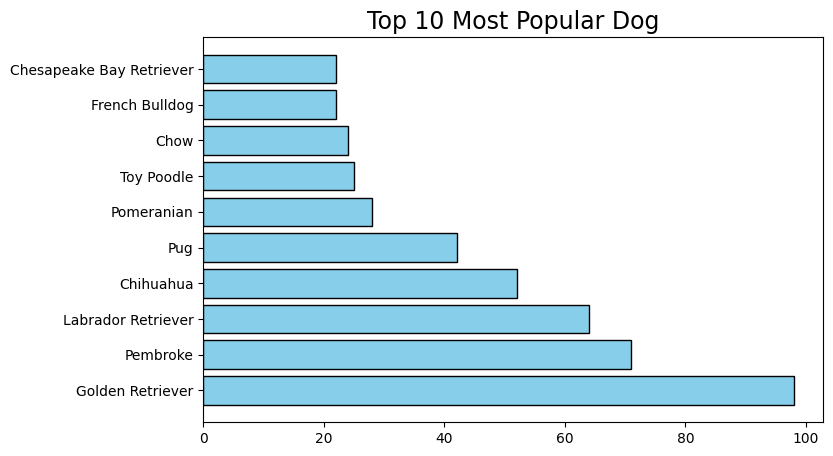

In [127]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Top 10 Most Popular Dog")



## INSIGHT 2: What are most common breeds?((Display in word cloud)) 

In [117]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 KB 170.0 kB/s eta 0:00:0000:0100:01


In [118]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

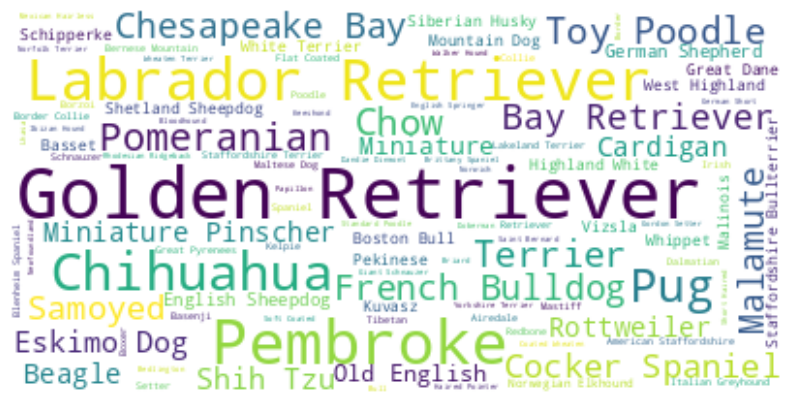

In [121]:
text = " ".join(i for i in final_df.breed_predicted)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## INSIGHT 3: Top 5 dog breed with the most likes

In [138]:
df_top5_likes = final_df.sort_values(by=['favorites','breed_predicted'], ascending=False)
df_top5_likes[['breed_predicted','favorites']].head(5)

,breed_predicted,favorites
56,Golden Retriever,85011
76,Malamute,75193
38,Chesapeake Bay Retriever,71144
784,Whippet,67100
71,Chow,66437


## INSIGHT 4: Categorizing the dog breeds by their type.

In [143]:
final_df.dog_type.value_counts()

Pupper     124
Doggo      32 
Puppo      16 
Floofer    5  
Name: dog_type, dtype: int64

In [151]:


# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#87CEEB", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()



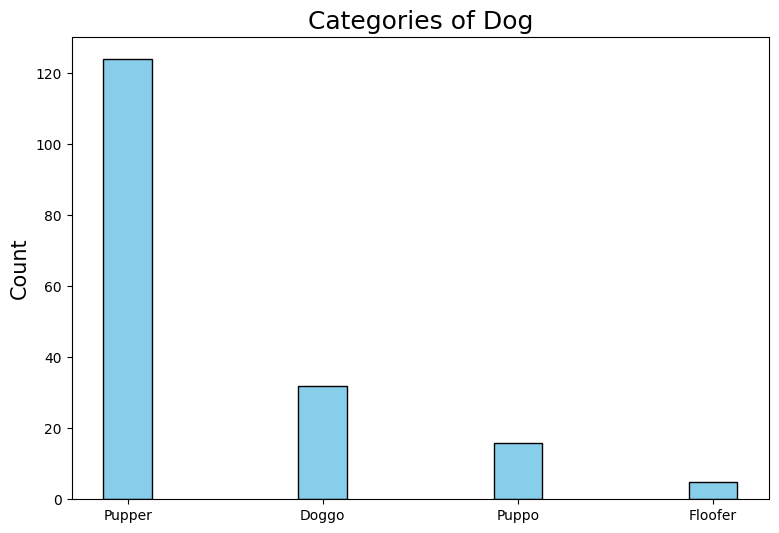

In [152]:
# plot dog types
dog_types = pd.DataFrame(final_df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Categories of Dog", 
         ylabel="Count")

## INSIGHT 5: Comparing Likes against Retweets

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


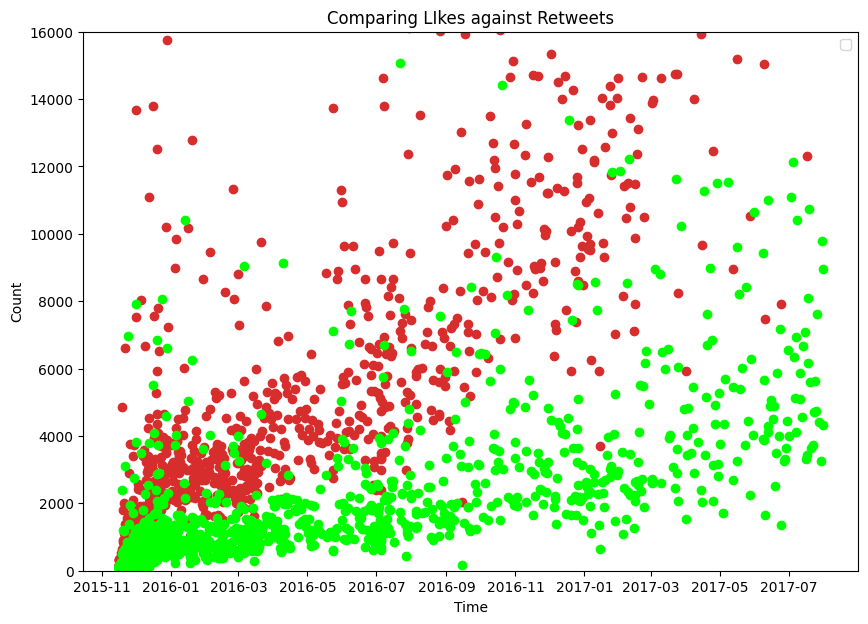

In [156]:
d = pd.DataFrame(final_df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,final_df.favorites, color="#d82d2d")
ax.plot_date(d,final_df.retweets, color="#00FF00")
ax.set_ylim([0,16000])
ax.set_title('Comparing LIkes against Retweets')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()